# 练习07加载图像并应用所学的各种方法

In [20]:
# Exercise 4
# from google.colab import drive
# drive.mount('/content/drive')

#### 

In [21]:
# cd /content/drive/My Drive/C13550/Lesson02/Exercise04/

#### 

In [22]:
import numpy as np  #Numpy
import cv2          #OpenCV
from matplotlib import pyplot as plt #Matplotlib
count = 0

#### 

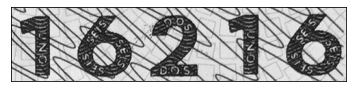

In [23]:
img = cv2.imread('number.jpg',0)
plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

#### 

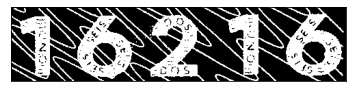

In [24]:
_,th1=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
th1 = (255-th1) 
# This step changes the black with white and viceversa in order to have white figures
plt.imshow(th1,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

#### 

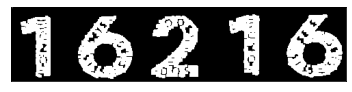

In [25]:
open1 = cv2.morphologyEx(th1, cv2.MORPH_OPEN, np.ones((4, 4),np.uint8))
plt.imshow(open1,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

#### 

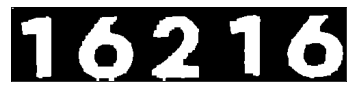

In [26]:
close1 = cv2.morphologyEx(open1, cv2.MORPH_CLOSE, np.ones((8, 8), np.uint8))
plt.imshow(close1,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

#### 

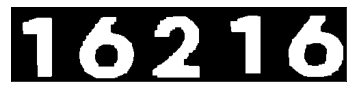

In [27]:
open2 = cv2.morphologyEx(close1, cv2.MORPH_OPEN,np.ones((7,12),np.uint8))
plt.imshow(open2,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

#### 

In [28]:
_, contours, _= cv2.findContours(open2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #Find contours
cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True) #Sort the contours
cntsLength = len(cntsSorted)
images = []
for idx in range(cntsLength): #Iterate over the contours
    contour_no = contours[idx] #Get the first number
    
    #if cv2.contourArea(contour_no) < 1000: #If the area is less than 1000, it's not a number
    #    continue
    
    x, y, w, h = cv2.boundingRect(contour_no) #Get its position and size
    no_tl = (x, y)
    no_br = (x + w, y + h)
    
    sample_no = open2[no_tl[1]:no_br[1], no_tl[0]:no_br[0]] #Crop the number from the original image
    
    # Good squared
    offset_reference = max(sample_no.shape[0], sample_no.shape[1])
    pad_offset_height = (offset_reference - sample_no.shape[0]) // 2
    pad_offset_width = (offset_reference - sample_no.shape[1]) // 2
    sample_no = np.pad(sample_no,
                       [(pad_offset_height, pad_offset_height), (pad_offset_width, pad_offset_width)],
                       mode='constant')  # height_b, height_a, width_b, width_a
    # Margin
    pad_height = int(sample_no.shape[0] / 6)
    pad_width = int(sample_no.shape[1] / 6)
    sample_no = np.pad(sample_no, [(pad_height, pad_height), (pad_width, pad_width)],
                       mode='constant')  # height_b, height_a, width_b, width_a
    
    images.append([x,sample_no]) #Add the image to the list of images and the X position
images = sorted(images, key=lambda x: x[0]) #Sort the list of images using the X position
imagesLength = len(images)
for idx in range(imagesLength):
    plt.subplot(1,imagesLength,idx+1),plt.imshow(images[idx][1],'gray') #Add every number to the plot
    plt.xticks([]),plt.yticks([]) #Delete the axis
    cv2.imwrite('number%d.jpg' % (count),images[idx][1])
    count+=1
#plt.savefig('ex4_6.jpg', bbox_inches='tight')
plt.show()


ValueError: not enough values to unpack (expected 3, got 2)